In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors 
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, accuracy_score

In [3]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

### Data Exploration

In [4]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.id.nunique()

569

In [6]:
data.shape

(569, 33)

In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols].apply(lambda x: np.isinf(x)).sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64

In [10]:
data.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
data.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [13]:
data[['radius_mean', 'radius_se', 'radius_worst']].describe()

,radius_mean,radius_se,radius_worst
count,569.000000,569.000000,569.000000
mean,14.127292,0.405172,16.269190
std,3.524049,0.277313,4.833242
min,6.981000,0.111500,7.930000
25%,11.700000,0.232400,13.010000
50%,13.370000,0.324200,14.970000
75%,15.780000,0.478900,18.790000
max,28.110000,2.873000,36.040000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


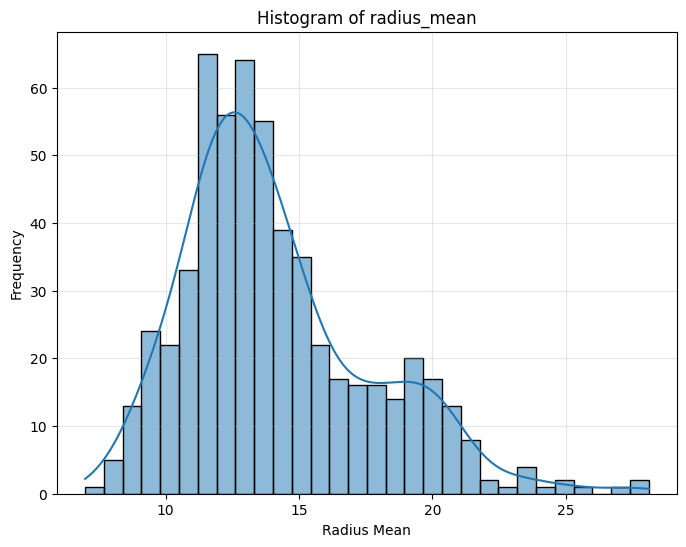

In [14]:
df_clean = data[['radius_mean']]

# Plot histogram with seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='radius_mean', bins=30, kde=True, edgecolor='black')
plt.title(f'Histogram of radius_mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

## Objective of the analysis

The objective of this project is to come up with a best fit unsupervised classification model to separate malignant and benign cancer cases.
The best fit model will be selected based on the accuracy of the separtation.

### Data Standardization

In [16]:
data = data.drop(columns = ['Unnamed: 32'])

In [17]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
# feature_names = data.feature_names

excluded_columns = ['id', 'diagnosis']
col_to_scale = [col for col in data.columns if col not in excluded_columns]

data_to_scale = data[col_to_scale]
data_excluded = data[excluded_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

data_scaled = pd.DataFrame(scaled_data, columns=col_to_scale)

data_final = pd.concat([data_scaled,data_excluded],axis=1)

data_final = data_final[data.columns]

data_final.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


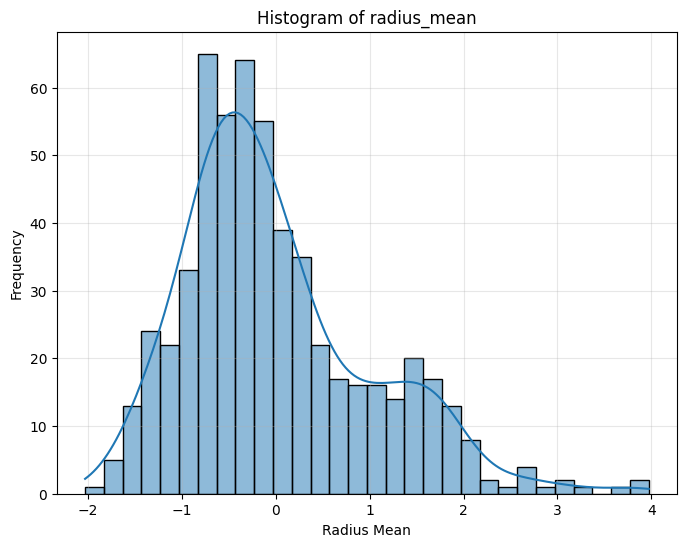

In [19]:
#plotting radius mean again now
df_clean = data_final[['radius_mean']]

# Plot histogram with seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='radius_mean', bins=30, kde=True, edgecolor='black')
plt.title(f'Histogram of radius_mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

### Separation of X and y

In [20]:
#separating the data into X_scaled and target variables
X = data_final[col_to_scale]
y = data_final[['diagnosis']]

In [21]:
y.value_counts()

diagnosis
B            357
M            212
Name: count, dtype: int64

In [22]:
le = LabelEncoder()
y = le.fit_transform(y) 
print("Shape of y:", y.shape)  # Should be (569,)
print("First few labels:", y[:5])
print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Shape of y: (569,)
First few labels: [1 1 1 1 1]
Label mapping: {'B': 0, 'M': 1}


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### KNN Classification

In [23]:
#apply PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(f"\nNumber of PCA components: {pca.n_components_}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.3f}")


Number of PCA components: 10
Explained variance ratio: 0.952


In [24]:
# Initial K-Means with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=42)
clusters = kmeans.fit_predict(X_pca)

In [25]:
#Evaluate clustering
sil_score = silhouette_score(X_pca, clusters)
db_score = davies_bouldin_score(X_pca, clusters)
ari_score = adjusted_rand_score(y, clusters)
print(f"\nK-Means (k=2) Metrics:")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}")
print(f"Adjusted Rand Index: {ari_score}")


K-Means (k=2) Metrics:
Silhouette Score: 0.356
Davies-Bouldin Score: 1.268
Adjusted Rand Index: 0.6536246043910179


In [26]:
# Step 6: Tune n_init and init
init_methods = ['k-means++', 'random']
n_init_values = [10, 20, 50]
best_sil_score = sil_score
best_params = {'n_clusters': 2, 'init': 'k-means++', 'n_init': 'auto'}

for init_method in init_methods:
    for n_init in n_init_values:
        kmeans = KMeans(n_clusters=2, init=init_method, n_init=n_init, random_state=42)
        clusters = kmeans.fit_predict(X_pca)
        sil_score = silhouette_score(X_pca, clusters)
        print(f"\nTesting init={init_method}, n_init={n_init}")
        print(f"Silhouette Score: {sil_score:.3f}")
        if sil_score > best_sil_score:
            best_sil_score = sil_score
            best_params = {'n_clusters': 2, 'init': init_method, 'n_init': n_init}

print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Silhouette Score: {best_sil_score:.3f}")


Testing init=k-means++, n_init=10
Silhouette Score: 0.358

Testing init=k-means++, n_init=20
Silhouette Score: 0.358

Testing init=k-means++, n_init=50
Silhouette Score: 0.358

Testing init=random, n_init=10
Silhouette Score: 0.358

Testing init=random, n_init=20
Silhouette Score: 0.358

Testing init=random, n_init=50
Silhouette Score: 0.358

Best Hyperparameters: {'n_clusters': 2, 'init': 'k-means++', 'n_init': 10}
Best Silhouette Score: 0.358


In [27]:
kmeans_final = KMeans(n_clusters=best_params['n_clusters'], 
                      init=best_params['init'], 
                      n_init=best_params['n_init'], 
                      random_state=42)
clusters_final = kmeans_final.fit_predict(X_pca)

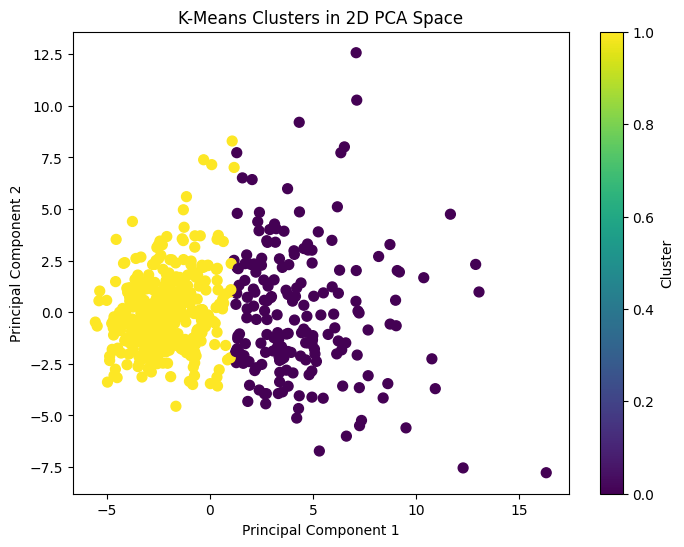

In [28]:
# Step 8: Visualize clusters in 2D PCA space
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters_final, cmap='viridis', s=50)
plt.title('K-Means Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [29]:
# Optional: Map clusters to true labels (if available)
cluster_labels = np.zeros_like(clusters_final)
for i in range(2):
    mask = (clusters_final == i)
    cluster_labels[mask] = np.bincount(y[mask]).argmax()
print("\nCluster to Label Mapping Accuracy:", accuracy_score(y, cluster_labels))
print("Cluster label mapping (0=B, 1=M):", cluster_labels[:5])


Cluster to Label Mapping Accuracy: 0.9103690685413005
Cluster label mapping (0=B, 1=M): [1 1 1 1 1]


In [30]:
cluster_labels_categorical = le.inverse_transform(cluster_labels)
print("First few categorical cluster labels:", cluster_labels_categorical[:5])

First few categorical cluster labels: ['M' 'M' 'M' 'M' 'M']


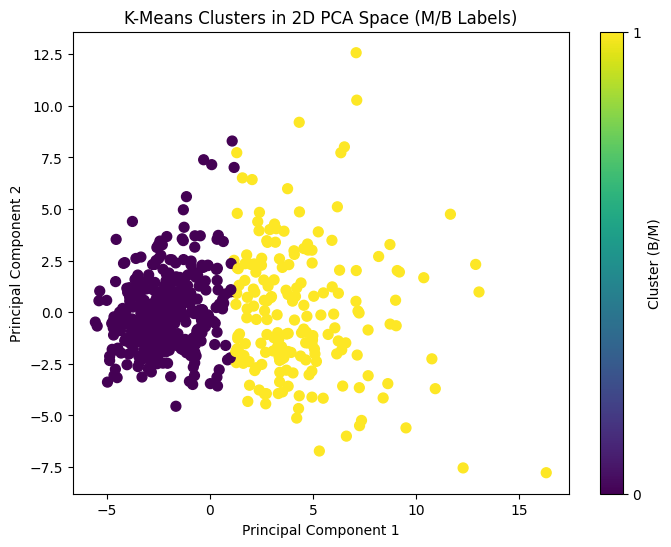

In [31]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Clusters in 2D PCA Space (M/B Labels)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(ticks=[0, 1], label='Cluster (B/M)')
plt.show()

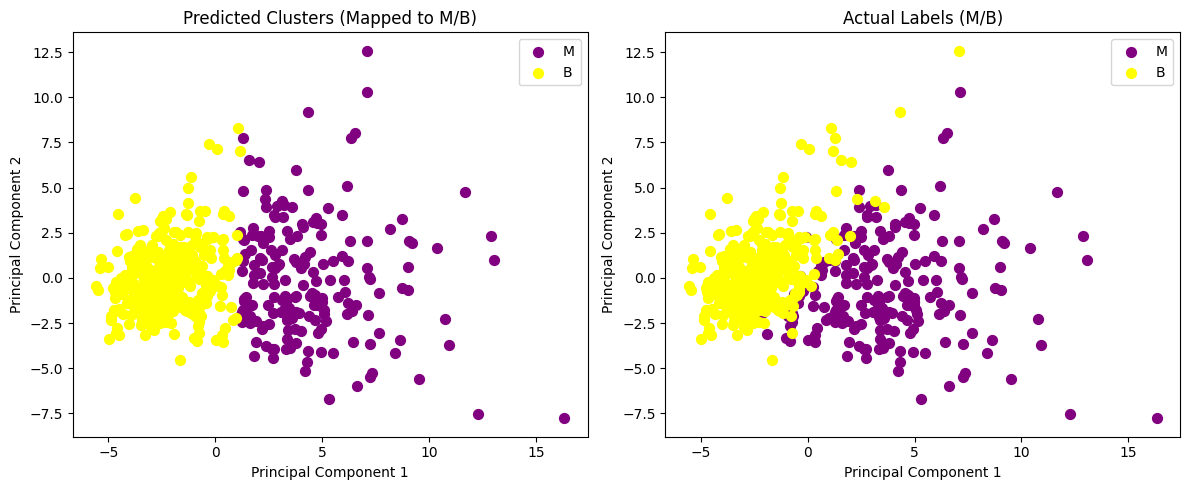

In [32]:
# Step 9: Plot Predicted vs. Actual Labels in 2D PCA Space
# Define consistent colors for M/B
colors = {'M': 'purple', 'B': 'yellow'}
plt.figure(figsize=(12, 5))

# Plot 1: Predicted Labels
plt.subplot(1, 2, 1)
for label in ['M', 'B']:
    mask = cluster_labels_categorical == label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[label], label=label, s=50)
plt.title('Predicted Clusters (Mapped to M/B)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot 2: Actual Labels
plt.subplot(1, 2, 2)
for label in ['M', 'B']:
    mask = data_final[['diagnosis']].squeeze() == label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[label], label=label, s=50)
plt.title('Actual Labels (M/B)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

### Fitting a GMM

In [33]:
#GMM fitting on the preprocessed data
gmm = GaussianMixture(n_components=2, covariance_type='full', n_init=3, init_params='kmeans', random_state=42)
clusters = gmm.fit_predict(X_pca)

In [34]:
clusters

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [35]:
cluster_labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    cluster_labels[mask] = np.bincount(y[mask]).argmax()
cluster_labels_categorical = le.inverse_transform(cluster_labels)
print("\nFirst few categorical cluster labels:", cluster_labels_categorical[:5])


First few categorical cluster labels: ['M' 'B' 'B' 'M' 'M']


In [36]:
sil_score = silhouette_score(X_pca, clusters)
db_score = davies_bouldin_score(X_pca, clusters)
ari_score = adjusted_rand_score(y, clusters)
accuracy = accuracy_score(y, cluster_labels)
bic_score = gmm.bic(X_pca)
print(f"\nGMM (n_components=2) Metrics:")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Score: {db_score:.3f}")
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Cluster to Label Mapping Accuracy: {accuracy:.3f}")
print(f"BIC: {bic_score:.3f}")


GMM (n_components=2) Metrics:
Silhouette Score: 0.263
Davies-Bouldin Score: 2.204
Adjusted Rand Index: 0.134
Cluster to Label Mapping Accuracy: 0.691
BIC: 17432.256


In [37]:
## Hyperparameter tuning
cov_types = ['full', 'diag', 'spherical']
n_init_values = [3, 5, 10]
best_sil_score = sil_score
best_params = {'n_components': 2, 'covariance_type': 'full', 'n_init': 3}

for cov_type in cov_types:
    for n_init in n_init_values:
        gmm = GaussianMixture(n_components=2, covariance_type=cov_type, n_init=n_init, init_params='kmeans', random_state=42)
        clusters = gmm.fit_predict(X_pca)
        sil_score = silhouette_score(X_pca, clusters)
        print(f"\nTesting covariance_type={cov_type}, n_init={n_init}")
        print(f"Silhouette Score: {sil_score:.3f}")
        if sil_score > best_sil_score:
            best_sil_score = sil_score
            best_params = {'n_components': 2, 'covariance_type': cov_type, 'n_init': n_init}

print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Silhouette Score: {best_sil_score:.3f}")


Testing covariance_type=full, n_init=3
Silhouette Score: 0.263

Testing covariance_type=full, n_init=5
Silhouette Score: 0.263

Testing covariance_type=full, n_init=10
Silhouette Score: 0.263

Testing covariance_type=diag, n_init=3
Silhouette Score: 0.277

Testing covariance_type=diag, n_init=5
Silhouette Score: 0.277

Testing covariance_type=diag, n_init=10
Silhouette Score: 0.277

Testing covariance_type=spherical, n_init=3
Silhouette Score: 0.326

Testing covariance_type=spherical, n_init=5
Silhouette Score: 0.326

Testing covariance_type=spherical, n_init=10
Silhouette Score: 0.326

Best Hyperparameters: {'n_components': 2, 'covariance_type': 'spherical', 'n_init': 3}
Best Silhouette Score: 0.326


In [38]:
#gmm with best params
gmm_final = GaussianMixture(n_components=best_params['n_components'], 
                            covariance_type=best_params['covariance_type'], 
                            n_init=best_params['n_init'], 
                            init_params='kmeans', 
                            random_state=42)
clusters_final = gmm_final.fit_predict(X_pca)
cluster_labels_final = np.zeros_like(clusters_final)
for i in range(2):
    mask = (clusters_final == i)
    cluster_labels_final[mask] = np.bincount(y[mask]).argmax()
cluster_labels_categorical_final = le.inverse_transform(cluster_labels_final)

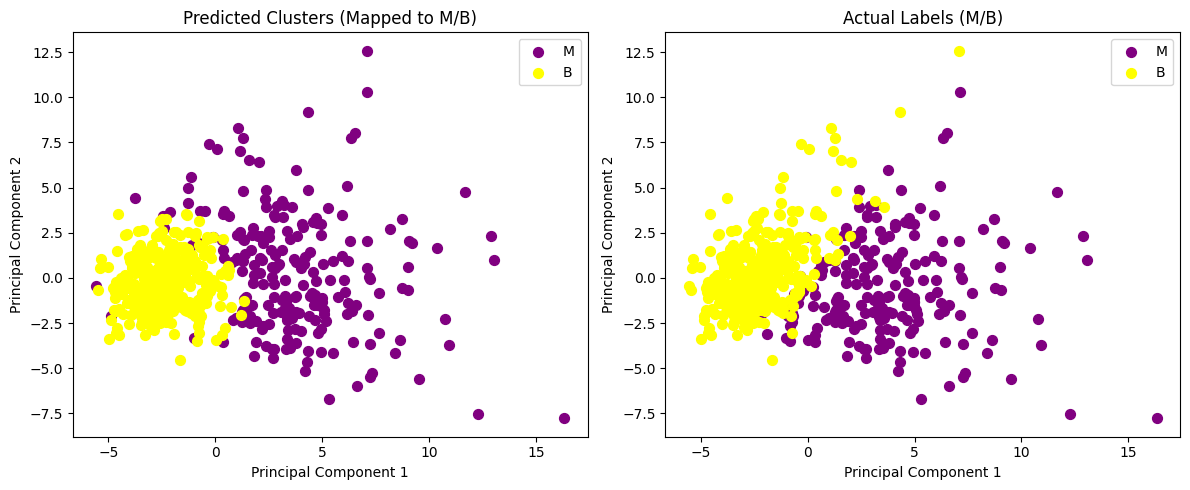

In [39]:
# Step 9: Plot Predicted vs. Actual Labels in 2D PCA Space
colors = {'M': 'purple', 'B': 'yellow'}
plt.figure(figsize=(12, 5))

#converting to 2d scale
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X)

# Plot 1: Predicted Labels
plt.subplot(1, 2, 1)
for label in ['M', 'B']:
    mask = cluster_labels_categorical_final == label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[label], label=label, s=50)
plt.title('Predicted Clusters (Mapped to M/B)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot 2: Actual Labels
plt.subplot(1, 2, 2)
for label in ['M', 'B']:
    mask = data_final[['diagnosis']].squeeze() == label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[label], label=label, s=50)
plt.title('Actual Labels (M/B)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

### Applying DBSCAN algorithm

In [40]:
X_pca.shape

(569, 10)

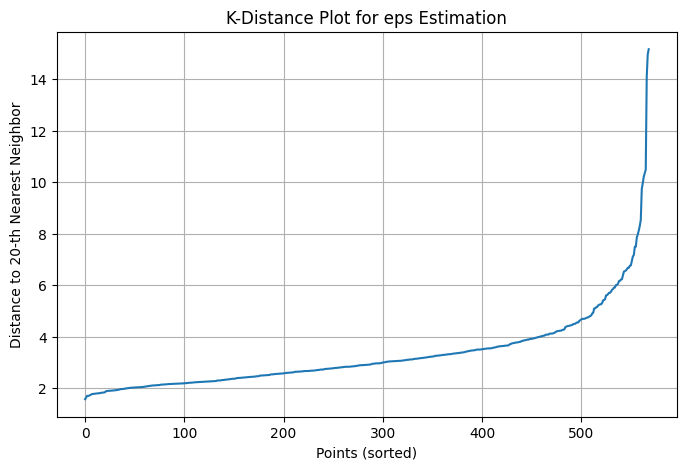

In [41]:
# Step 3: K-Distance Plot to Estimate eps
min_samples = 20  # Starting point
neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(X_pca)
distances, _ = neigh.kneighbors(X_pca)
k_distances = np.sort(distances[:, -1])
plt.figure(figsize=(8, 5))
plt.plot(range(len(k_distances)), k_distances)
plt.title('K-Distance Plot for eps Estimation')
plt.xlabel('Points (sorted)')
plt.ylabel(f'Distance to {min_samples}-th Nearest Neighbor')
plt.grid(True)
plt.show()

In [42]:
# Step 4: DBSCAN Clustering
dbscan = DBSCAN(eps=4, min_samples=20, metric='euclidean', algorithm='auto')
clusters = dbscan.fit_predict(X_pca)
n_clusters = len(np.unique(clusters[clusters != -1]))
n_noise = np.sum(clusters == -1)
print(f"\nDBSCAN (eps=0.5, min_samples=5) Results:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

#Scrapping DBSCAn as it is forming only one cluster


DBSCAN (eps=0.5, min_samples=5) Results:
Number of clusters: 1
Number of noise points: 47


### Agglomerative Clustering

In [44]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
clusters = agg.fit_predict(X_pca)

In [45]:
cluster_labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    cluster_labels[mask] = np.bincount(y[mask]).argmax()
cluster_labels_categorical = le.inverse_transform(cluster_labels)

In [46]:
# Evaluate
sil_score = silhouette_score(X_pca, clusters) if len(np.unique(clusters)) > 1 else "N/A"
db_score = davies_bouldin_score(X_pca, clusters) if len(np.unique(clusters)) > 1 else "N/A"
ari_score = adjusted_rand_score(y, cluster_labels)
accuracy = accuracy_score(y, cluster_labels)
print(f"\nAgglomerative Clustering Metrics:")
print(f"Silhouette Score: {sil_score}")
print(f"Davies-Bouldin Score: {db_score}")
print(f"Adjusted Rand Index: {ari_score:.3f}")
print(f"Cluster to Label Mapping Accuracy: {accuracy:.3f}")


Agglomerative Clustering Metrics:
Silhouette Score: 0.29599303933760224
Davies-Bouldin Score: 1.3804594326308774
Adjusted Rand Index: 0.702
Cluster to Label Mapping Accuracy: 0.919


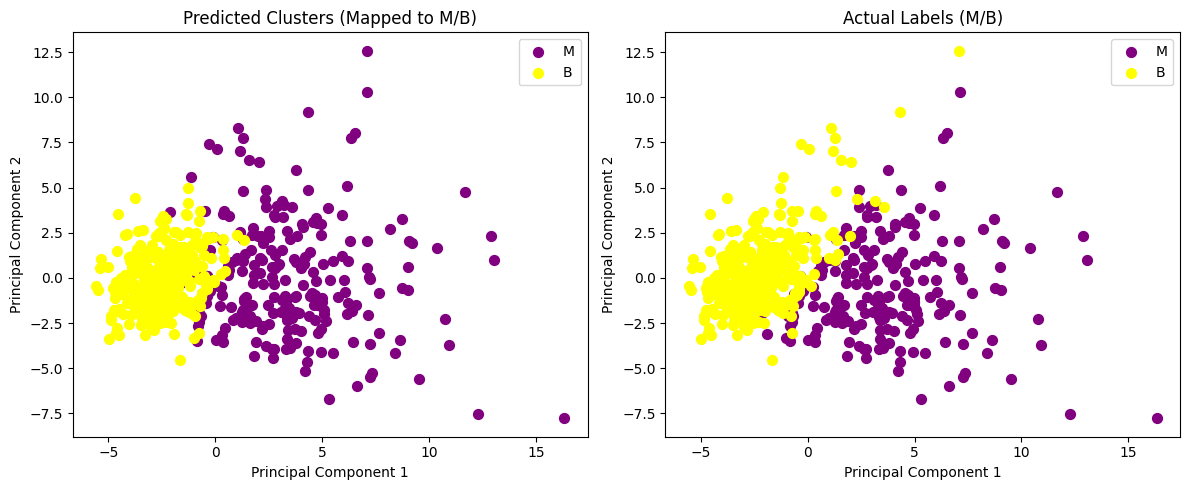

In [48]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for label in ['M', 'B']:
    mask = cluster_labels_categorical == label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[label], label=label, s=50)
plt.title('Predicted Clusters (Mapped to M/B)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.subplot(1, 2, 2)
for label in ['M', 'B']:
    mask = data_final[['diagnosis']].squeeze() == label
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[label], label=label, s=50)
plt.title('Actual Labels (M/B)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.tight_layout()
plt.show()